In [1]:
import timeit

import numpy as np
import matplotlib.pyplot as plt
import keras.preprocessing.image as k_image
from keras.applications import mobilenet_v2
from tqdm import tqdm_notebook as tqdm

Using TensorFlow backend.


In [2]:
from visualization import visualize_activations

In [3]:
from MobileNetV2_style import StyleTransfer

# MobileNetV2 based style transfer

## Example images

In [4]:
def iterate_and_collect(st, n):
    """ Function that performs n iterations and collects data """

    iterations = range(1, n+1)
    times = []
    images = []
    losses = []

    for i in tqdm(iterations):

        # optimize and get elapsed time
        start_time = timeit.default_timer()
        st.optimize()
        elapsed = timeit.default_timer() - start_time

        # save result
        times.append(elapsed)
        images.append(st.get_image())
        losses.append(st.get_losses())
    
    return iterations, times, images, losses

In [5]:
st_style   = StyleTransfer('images/content_6.jpg', 'images/gravel.jpg', style_weight=200, content_weight=0.5)
st_content = StyleTransfer('images/content_6.jpg', 'images/gravel.jpg', style_weight=1, content_weight=1)

Instructions for updating:
Colocations handled automatically by placer.


/home/regzand/.local/lib/python3.7/site-packages/keras_applications/mobilenet_v2.py:295: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [6]:
data_style = iterate_and_collect(st_style, 10)
data_content = iterate_and_collect(st_content, 10)

### Input images

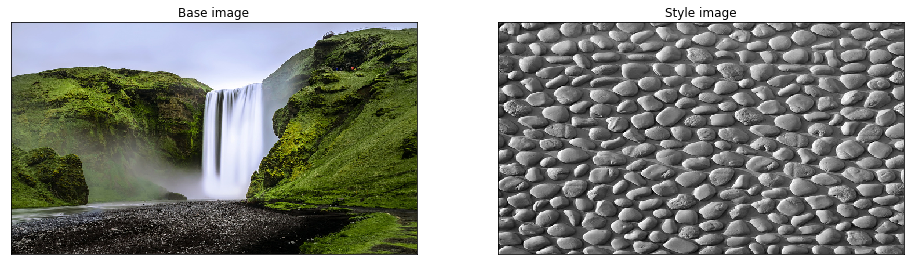

In [7]:
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), subplot_kw={'xticks': [], 'yticks': []})
axs[0].set_title("Base image")
axs[1].set_title("Style image")
axs[0].imshow(st_style.base_image)
axs[1].imshow(st_style.style_image);

### Generated images

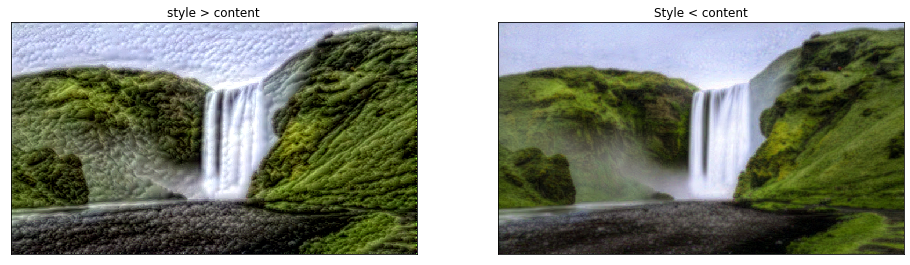

In [8]:
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), subplot_kw={'xticks': [], 'yticks': []})
axs[0].set_title("style > content")
axs[1].set_title("Style < content")
axs[0].imshow(st_style.get_image())
axs[1].imshow(st_content.get_image());

### Loss function

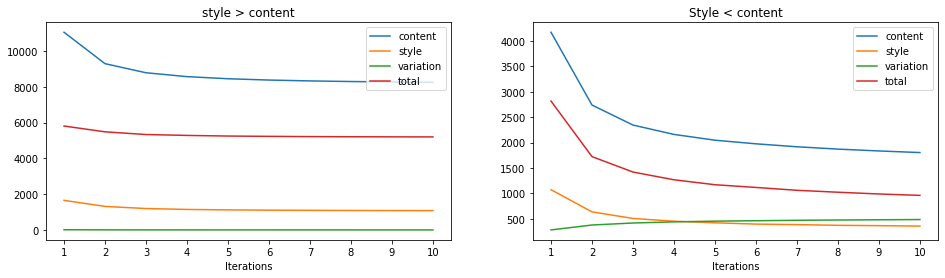

In [9]:
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4), subplot_kw={'xlabel': 'Iterations'})
axs[0].set_title("style > content")
axs[1].set_title("Style < content")
axs[0].plot(data_style[0], data_style[3])
axs[1].plot(data_content[0], data_content[3])
axs[0].set_xticks(data_style[0])
axs[1].set_xticks(data_content[0])
axs[0].legend(['content', 'style', 'variation', 'total'], loc='upper right')
axs[1].legend(['content', 'style', 'variation', 'total'], loc='upper right');

### Iteration times

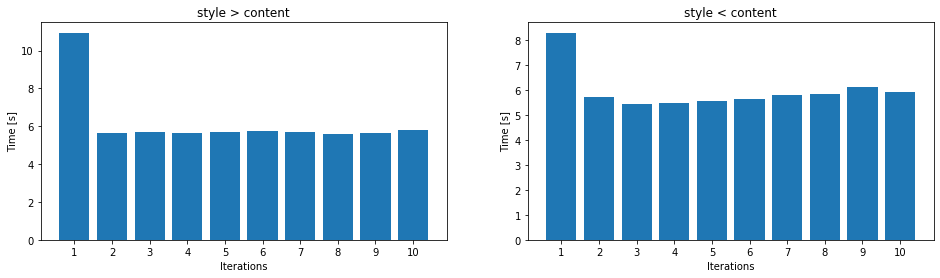

In [10]:
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4), subplot_kw={'xlabel': 'Iterations', 'ylabel': 'Time [s]'})
axs[0].set_title("style > content")
axs[1].set_title("style < content")
axs[0].bar(data_style[0], data_style[1])
axs[1].bar(data_content[0], data_content[1]);
axs[0].set_xticks(data_style[0])
axs[1].set_xticks(data_content[0]);

In [11]:
st_style.get_image().save('outputs/mobile-style.jpg')
st_content.get_image().save('outputs/mobile-content.jpg')

## Layers visualization

In [12]:
model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=True)

In [13]:
image_path = 'images/gravel.jpg'

# open, parse and preprocess image
image = k_image.load_img(image_path, target_size=(224, 224))
x = k_image.img_to_array(image)
x = np.expand_dims(x, axis=0)
x = mobilenet_v2.preprocess_input(x)

In [14]:
layers_names = ['block_1_expand', 'block_1_depthwise', 'block_2_expand', 'block_2_depthwise']
layers = [i for i in range(len(model.layers)) if model.layers[i].name in layers_names]

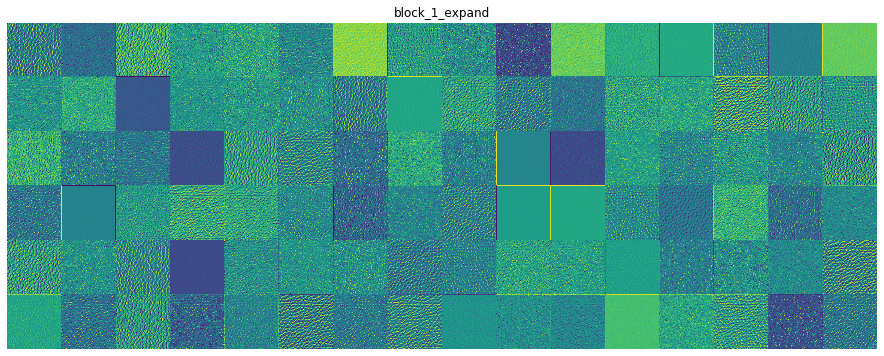

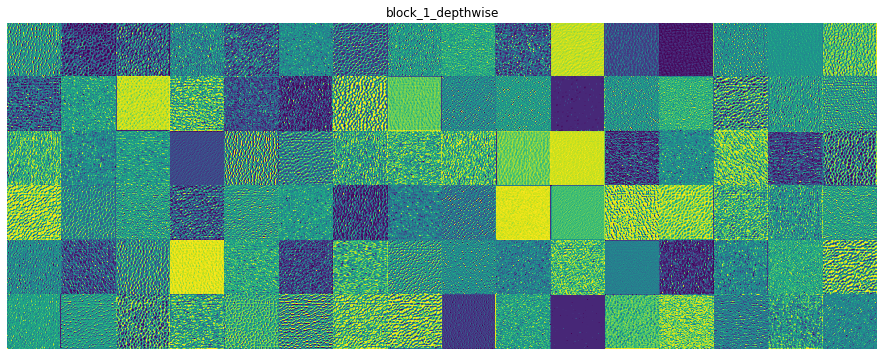

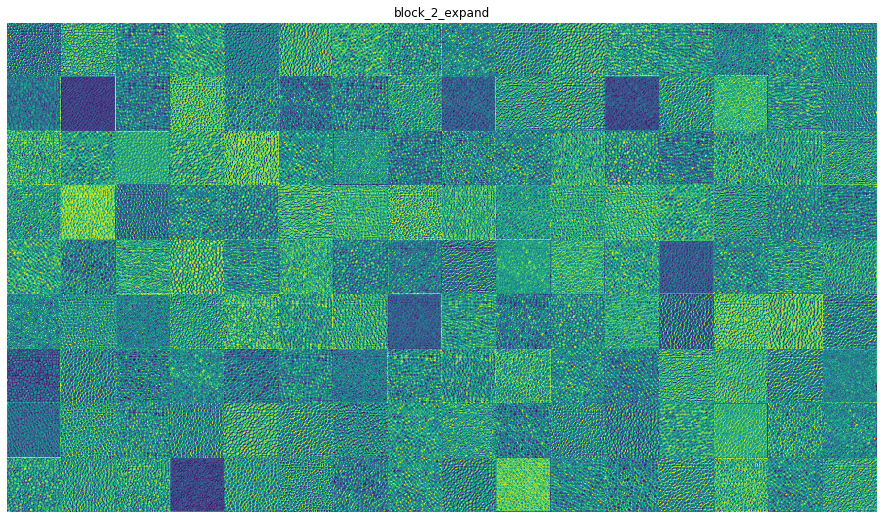

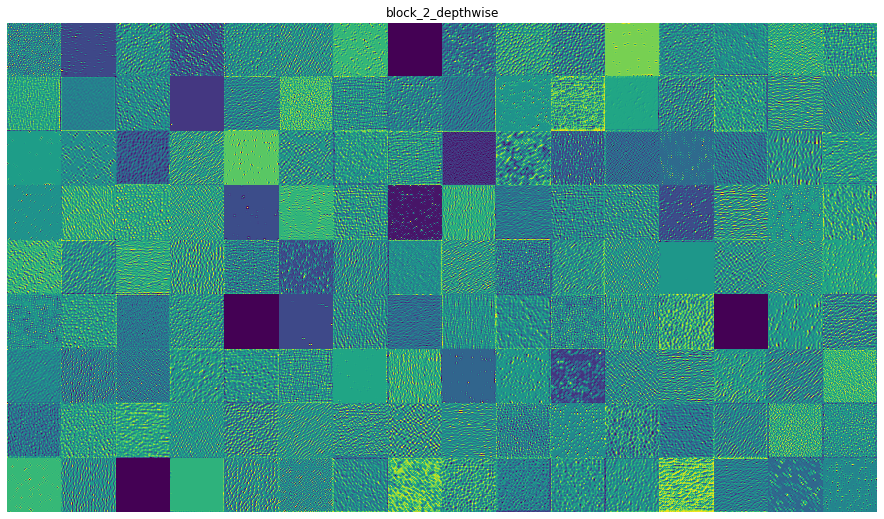

In [15]:
visualize_activations(model, x, select_layers=layers)